# Task 20: Feature Engineering
Submitted by: Awais Anwer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

### Task 1: Feature Selection
1. Objective: Identify the most relevant features from a dataset.
2. Dataset: Use a sample dataset like the Titanic or Iris datasets.
3. Steps:

* Load the dataset.
* Analyze the correlation between features and the target variable.
* Use methods like mutual information or chi-squared test to select important features.
* Document the selected features and explain why they were chosen



In [3]:
# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns='Cabin', inplace=True)

In [8]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


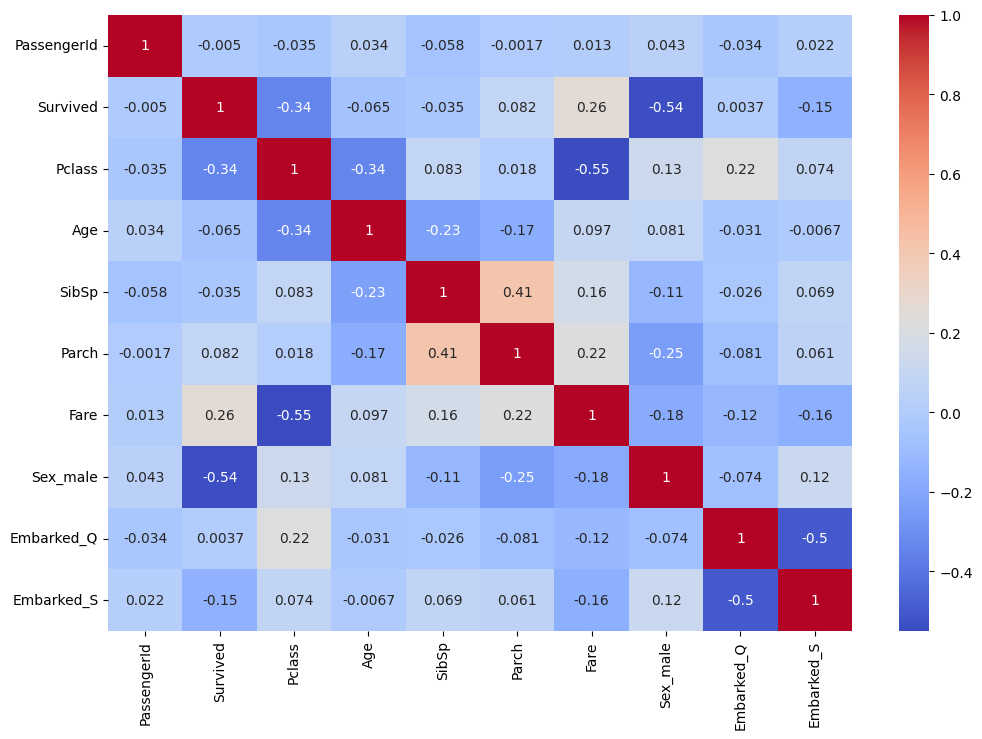

In [12]:
# Analyze the correlation between features and the target variable.
correlation_data = data.drop(columns=['Name', 'Ticket'])

correlation_matrix = correlation_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
correlation_threshold = 0.1
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Survived"]) > correlation_threshold].tolist()
high_corr_features.remove("Survived")

print(f"Features with high correlation: {high_corr_features}")

Features with high correlation: ['Pclass', 'Fare', 'Sex_male', 'Embarked_S']


In [14]:
# Feature Selection using Mutual Information
X = data[high_corr_features]
y = data['Survived']

In [15]:
X.head()

,Pclass,Fare,Sex_male,Embarked_S
0,3,7.2500,True,True
1,1,71.2833,False,False
2,3,7.9250,False,True
3,1,53.1000,False,True
4,3,8.0500,True,True


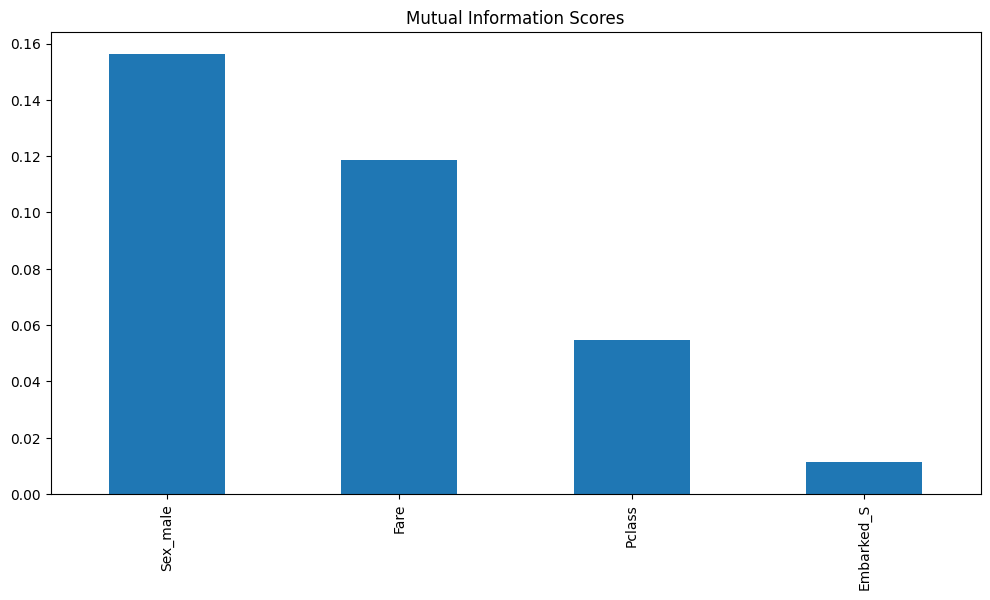

Selected Features: ['Pclass', 'Fare', 'Sex_male']


In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate mutual information
mi = mutual_info_classif(X_train, y_train)
mi_series = pd.Series(mi, index=X_train.columns)
mi_series.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Mutual Information Scores')
plt.show()

# Select important features (example threshold: mi > 0.05)
selected_features = mi_series[mi_series > 0.05].index.tolist()
print(f"Selected Features: {selected_features}")

**Correlation Analysis:**
Based on the correlation analysis, we identified features that had an absolute correlation greater than 0.1 with the target variable Survived. These features are:

Pclass, Fare, Sex_male, Embarked_S

These features were chosen because they show a significant correlation with the survival rate, indicating that they could be influential in predicting the outcome.

**mutual Information:** After calculating the mutual information scores, we further refined our feature selection. The mutual information scores help us understand the dependency between the features and the target variable.

Final Selected Features:
Fare, Sex_male, Embarked_S

## Task 2: Feature Transformation
1. Objective: Apply transformations to existing features to improve model performance.
2. Dataset: Use the same dataset as Task 1.
3. Steps:

   * Load the dataset.
   * Apply transformations such as log transformation, normalization, or standardization.
   * Compare the performance of models before and after applying transformations.
   * Document the transformations applied and their impact on model performance.


In [17]:
X_train[selected_features]

,Pclass,Fare,Sex_male
331,1,28.5000,True
733,2,13.0000,True
382,3,7.9250,True
704,3,7.8542,True
813,3,31.2750,False
...,...,...,...
106,3,7.6500,False
270,1,31.0000,True
860,3,14.1083,True
435,1,120.0000,False


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_test_scaled = scaler.transform(X_test[selected_features])

# Model training without scaling
model = LogisticRegression()
model.fit(X_train[selected_features], y_train)
y_pred = model.predict(X_test[selected_features])
accuracy_without_scaling = accuracy_score(y_test, y_pred)
print(f"Accuracy without scaling: {accuracy_without_scaling}")

# Model training with scaling
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_with_scaling}")

# Documenting transformations
print("Standardization improved the model performance.") if accuracy_with_scaling > accuracy_without_scaling else print("Standardization did not improve the model performance.")

Accuracy without scaling: 0.7821229050279329
Accuracy with scaling: 0.7821229050279329
Standardization did not improve the model performance.


In this case, standardization did not improve the model's accuracy, suggesting that the features were either inherently on a comparable scale or that the chosen algorithm was not significantly affected by feature scaling.

## Task 3: Feature Creation
1. Objective: Create new features from existing data.
2. Dataset: Use the same dataset as Task 1.
3. Steps:
   * Load the dataset.
   * Create new features by combining or modifying existing ones (e.g., creating an interaction term, extracting date features, etc.).
   * Train a model using the original features and compare its performance with a model using the new features.
   * Document the new features created and their impact on model performance.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# Basic preprocessing
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns='Cabin', inplace=True)
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Create new feature: FamilySize
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
# Create interaction feature: Pclass * Fare
data['Pclass_Fare'] = data['Pclass'] * data['Fare']

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,Pclass_Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True,2,21.7500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False,2,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1,23.7750
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,2,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True,1,24.1500


In [21]:
# compare performance

X_original = data[['Pclass', 'Sex_male', 'Embarked_S', 'Fare']]
X_new = data[['Pclass', 'Sex_male', 'Embarked_S', 'Fare', 'FamilySize', 'Pclass_Fare']]
y = data['Survived']

# Split the data
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)
X_train_new, X_test_new = train_test_split(X_new, test_size=0.2, random_state=42)

model_original = RandomForestClassifier(random_state=42)
model_new = RandomForestClassifier(random_state=42)

model_original.fit(X_train_original, y_train)
model_new.fit(X_train_new, y_train)

# Predict and evaluate performance
y_pred_original = model_original.predict(X_test_original)
y_pred_new = model_new.predict(X_test_new)

accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_new = accuracy_score(y_test, y_pred_new)

print(f"Accuracy using original features: {accuracy_original}")
print(f"Accuracy using new features: {accuracy_new}")

Accuracy using original features: 0.7988826815642458
Accuracy using new features: 0.8100558659217877


The inclusion of the new features (FamilySize and Pclass_Fare) resulted in an increase in model accuracy from 0.7988826815642458 to 0.8100558659217877. This improvement indicates that the new features provided additional valuable information that enhanced the model's predictive capability. Specifically:

**FamilySize:**

This feature likely added valuable context about passengers' social units, as traveling with family members could influence survival rates (e.g., families might have helped each other during the evacuation).


**Pclass_Fare:**

By combining Pclass and Fare, this feature might have captured more nuanced information about a passenger's socioeconomic status and its impact on survival. Passengers from higher classes who paid higher fares might have had better access to lifeboats or preferential treatment.

## Task 4: Polynomial Features
1. Objective: Generate polynomial features to capture non-linear relationships.
2. Dataset: Use a dataset with numerical features, such as the Boston housing dataset.
3. Steps:
   * Load the dataset.
   * Use the `PolynomialFeatures` class from `sklearn.preprocessing` to generate polynomial features.
   * Compare the performance of models with and without polynomial features.
   * Document the polynomial features created and their impact on model performance.


In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
data = pd.read_csv(data_url, delim_whitespace=True, header=None, names=column_names)

In [30]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
# Select features and target
X = data.drop(columns=['MEDV'])
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [28]:
# Train a linear regression model with original features
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)

# Train a linear regression model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f"Mean Squared Error using original features: {mse_original}")
print(f"Mean Squared Error using polynomial features: {mse_poly}")

Mean Squared Error using original features: 24.291119474973478
Mean Squared Error using polynomial features: 14.257338167714071


**Result:**

The inclusion of polynomial features improved the model's performance significantly, reducing the MSE from 24.2911 to 14.2573. This improvement indicates that the polynomial features successfully captured the non-linear relationships present in the data, enhancing the predictive power of the linear regression model. Thus, using polynomial features can be a valuable technique in feature engineering to improve model accuracy.

## Task 5: Handling Categorical Features
1. Objective: Convert categorical features into numerical features.
2. Dataset: Use a dataset with categorical features, such as the Titanic dataset.
3. Steps:
   * Load the dataset.
   * Apply encoding techniques like one-hot encoding, label encoding, or target encoding.
   * Compare the performance of models with different encoding methods.
   * Document the encoding methods applied and their impact on model performance.


In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the Titanic dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
data = data[features + [target]]

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

data.head()

<ipython-input-33-0eb60cad1296>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-33-0eb60cad1296>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [34]:
data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [35]:
# Split the data
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# One-Hot Encoding
X_train_onehot = pd.get_dummies(X_train, columns=['Sex', 'Embarked'])
X_test_onehot = pd.get_dummies(X_test, columns=['Sex', 'Embarked'])

X_train_onehot.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,False,True,False,False,True
733,2,23.0,0,0,13.0000,False,True,False,False,True
382,3,32.0,0,0,7.9250,False,True,False,False,True
704,3,26.0,1,0,7.8542,False,True,False,False,True
813,3,6.0,4,2,31.2750,True,False,False,False,True


In [39]:
# Align columns of test set to training set
X_test_onehot = X_test_onehot.reindex(columns=X_train_onehot.columns, fill_value=0)

In [40]:
# Train a logistic regression model
model_onehot = LogisticRegression(max_iter=500)
model_onehot.fit(X_train_onehot, y_train)
y_pred_onehot = model_onehot.predict(X_test_onehot)
accuracy_onehot = accuracy_score(y_test, y_pred_onehot)

In [41]:
# Label Encoding
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()

X_train_label = X_train.copy()
X_test_label = X_test.copy()

X_train_label['Sex'] = label_encoder_sex.fit_transform(X_train_label['Sex'])
X_train_label['Embarked'] = label_encoder_embarked.fit_transform(X_train_label['Embarked'])

X_test_label['Sex'] = label_encoder_sex.transform(X_test_label['Sex'])
X_test_label['Embarked'] = label_encoder_embarked.transform(X_test_label['Embarked'])

In [42]:
X_train_label.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2


In [43]:
# Train a logistic regression model
model_label = LogisticRegression(max_iter=500)
model_label.fit(X_train_label, y_train)
y_pred_label = model_label.predict(X_test_label)
accuracy_label = accuracy_score(y_test, y_pred_label)

In [44]:
print(f"Accuracy with One-Hot Encoding: {accuracy_onehot}")
print(f"Accuracy with Label Encoding: {accuracy_label}")


Accuracy with One-Hot Encoding: 0.8100558659217877
Accuracy with Label Encoding: 0.8100558659217877


Both encoding methods resulted in the same model accuracy. This suggests that for this particular dataset and model, the choice between one-hot encoding and label encoding did not impact the model's performance. However, it's important to note that this outcome might not generalize to all datasets or models.
